In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import read_config_utils as cu

import time

import sys
import os

from os.path import exists

In [3]:




#input_dir = 'bootstrap-toy-study6b-1d-1a'
#input_dir = 'bootstrap-toy-study6b-1d-1a-badres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-goodres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-verygoodres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-perfect'


#input_dir = 'simple-pdf-toy-study6b-1d-1a-1k'


#input_dir = 'fit-pdf-toy-study-1d-1a'

#input_dir = 'hist-pdf-toy-study-1d-1a'

#input_dir = 'bootstrap-toy-study8a-1d-1c'

#input_dir = 'bootstrap-toy-study8a-1d-1d'

#input_dir = 'hist-pdf-toy-study-1d-1b-mediumbad'

#input_dir = 'bootstrap-toy-study8a-1d-1d-nominal-resolution'
#input_dir = 'bootstrap-toy-study8a-1d-1d-perfect'

#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution'

input_dir = 'hist-pdf-toy-study-1d-1a-perfect'

#input_dir = 'bootstrap-toy-study8a-1d-1d-gpu0'


#xmin = 0.0
#xmax = 0.5

#xmin = 0.5
#xmax = 1.5

xmin = 1.5
xmax = 5.0


ncalc = 1000
npoints = 4000







In [4]:
with open('%s/train-and-true-samples.npy' % input_dir,'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)


In [5]:
train_pts.shape

(100000, 1)

In [6]:
config_file = '%s/config.txt' % (input_dir)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()

In [7]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)



 Number of feature dimensions: 1




## Check the particle and detector distributions

<function matplotlib.pyplot.show(close=None, block=None)>

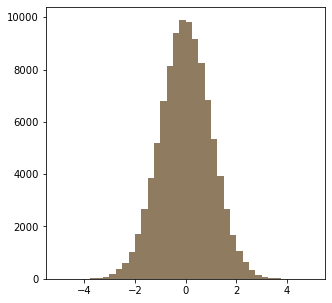

In [8]:
fig,ax = plt.subplots( 1, ndim, figsize=(5*ndim,5))

hbins=40
x0min=-5
x0max=5
x1min=-6
x1max=6

for fi in range(ndim) :
    
    if ndim > 1 :
        thisax = ax[fi]
    else :
        thisax = ax
        
    thisax.hist( train_pts[:,fi], bins=hbins, range=[x0min,x0max] )
    thisax.hist( train_det_pts[:,fi], bins=hbins, range=[x0min,x0max], alpha=0.5 )
    

plt.show

In [9]:
n_samples = 0

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        n_samples = n_samples + 1
        
print("\n\n Found %d bootstrap samples.\n\n" % n_samples )



 Found 500 bootstrap samples.




## Load the weights for the first ncalc events from all of the bootstraps

In [10]:
#bootstrap_weights = np.zeros( shape = (n_samples, ncalc) )
bootstrap_weights = np.zeros( shape = (n_samples, npoints) )

In [11]:
for fi in range(n_samples) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        print( 'loading %s' % fname )
        with open(fname,'rb') as f :
            this_bootstrap_weights = np.load(f)
        #bootstrap_weights[fi,:] = this_bootstrap_weights[0:ncalc]
        bootstrap_weights[fi,:] = this_bootstrap_weights[0:npoints]
        
    else :
        print("\n\n *** file %s does not exist!\n\n" % fname )
        sys.exit()
        


loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-000.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-001.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-002.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-003.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-004.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-005.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-006.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-007.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-008.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-009.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-010.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-011.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-012.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-013.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-014

loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-211.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-212.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-213.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-214.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-215.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-216.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-217.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-218.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-219.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-220.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-221.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-222.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-223.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-224.npy
loading hist-pdf-toy-study-1d-1a-perfect/bootstrap-weights-225

<function matplotlib.pyplot.show(close=None, block=None)>

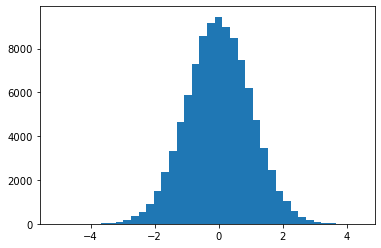

In [12]:
plt.hist( train_pts[:,0], bins=40)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

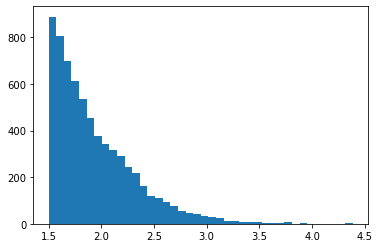

In [13]:
plt.hist( train_pts[:,0][(train_pts[:,0]>xmin) & (train_pts[:,0]<xmax)], bins=40)
plt.show

In [14]:

corr_array = np.zeros( ncalc )
print(" ncalc = %d" % ncalc)

point_index = 57

xmask = np.zeros( ncalc, dtype=bool )

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]
    xmask[i] = 1


 ncalc = 1000


<function matplotlib.pyplot.show(close=None, block=None)>

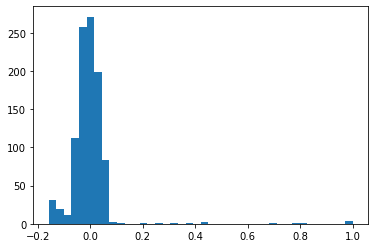

In [15]:
plt.hist( corr_array[xmask], bins=40)
plt.show

In [16]:
df0 = train_pts[:,0] - train_pts[point_index,0]


<function matplotlib.pyplot.show(close=None, block=None)>

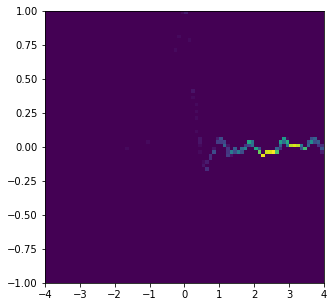

In [17]:
fig,ax = plt.subplots( 1, 1, figsize=(5,5))
ax.hist2d( df0[:ncalc][xmask], corr_array[xmask], bins=[80,80], range=([-4,4],[-1,1]))

plt.show

In [18]:
%%time


is_first = True

for point_index in range(npoints) :
    
    
    if (point_index % (npoints/10) == 0 ) :
        print(" Working on point %3d" % point_index)

    if train_pts[point_index,0] < xmin : continue
    if train_pts[point_index,0] > xmax : continue

        
    this_point_corr_array = np.zeros(ncalc)
    
    for i in range(ncalc) :
        #if i == point_index : continue
        pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
        this_point_corr_array[i] = pair_cor[0,1]
    
    if is_first :
        all_points_df0 = train_pts[:ncalc,0] - train_pts[point_index,0]
        all_points_dr = np.sqrt( all_points_df0*all_points_df0)

        all_points_corr_array = this_point_corr_array
        all_points_f0b = train_pts[:ncalc,0]
        
        is_first = False

    else :
        this_point_df0 = train_pts[:ncalc,0] - train_pts[point_index,0]
        this_point_dr = np.sqrt( this_point_df0*this_point_df0 )

        all_points_df0 = np.append( all_points_df0, this_point_df0 )
        all_points_dr = np.append( all_points_dr, this_point_dr )

        all_points_corr_array = np.append(all_points_corr_array, this_point_corr_array)
        all_points_f0b = np.append(all_points_f0b, train_pts[:ncalc,0] )



 Working on point   0
 Working on point 400
 Working on point 800
 Working on point 1200
 Working on point 1600
 Working on point 2000
 Working on point 2400
 Working on point 2800
 Working on point 3200
 Working on point 3600
CPU times: user 13.5 s, sys: 352 ms, total: 13.8 s
Wall time: 13.8 s


In [19]:
train_pts.shape

(100000, 1)

In [20]:
bootstrap_weights.shape

(500, 4000)

In [21]:
all_points_corr_array.shape

(264000,)

In [22]:
all_points_df0.shape

(264000,)

<function matplotlib.pyplot.show(close=None, block=None)>

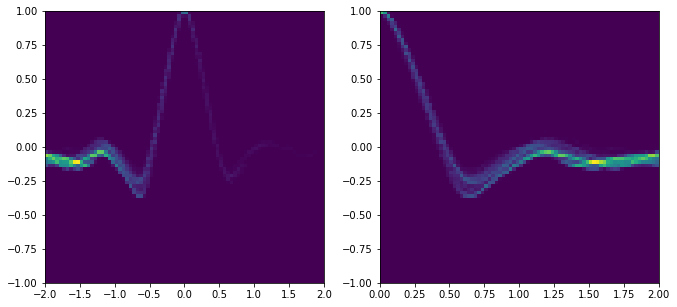

In [23]:
plotxmax = 2

fig,ax = plt.subplots( 1, 2, figsize=(11,5))
ax[0].hist2d( all_points_df0, all_points_corr_array, bins=[80,80], range=([-1*plotxmax,plotxmax],[-1,1]))
ax[1].hist2d( all_points_dr, all_points_corr_array, bins=[80,80], range=([0,plotxmax],[-1,1]))

#plt.savefig('plots/correlation-vs-distance-%s.png' % sample_name, bbox_inches='tight')
#plt.savefig('plots/correlation-vs-distance-%s.pdf' % sample_name, bbox_inches='tight')

plt.show

In [24]:
fname = "%s/correlations-xrange-%.2f-to-%.2f.npy" % (input_dir, xmin, xmax)
print(' output file : %s' % fname)

 output file : hist-pdf-toy-study-1d-1a-perfect/correlations-xrange-1.50-to-5.00.npy


## Save the output

In [25]:
fname = "%s/correlations-xrange-%.2f-to-%.2f.npy" % (input_dir, xmin, xmax)
with open( fname, 'wb') as f :
    np.save(f, all_points_df0)
    np.save(f, all_points_corr_array)
    

In [26]:
fname = "%s/correlation-points-feature-coords-xrange-%.2f-to-%.2f.npy" % (input_dir, xmin, xmax)
with open( fname, 'wb') as f :
    np.save(f, all_points_f0b)
